# 1. Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

# 2. Data

In [2]:
#read data
df31 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-31.csv')
df31.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,7,2018-07-31 04:07:33,459,Kombinat,4,Bronowice Małe,2018-07-31 04:07:00,6.352185e+18,6351558574044455170,STOPPING,0,7.0
1,14,2018-07-31 04:13:24,423,Struga,4,Bronowice Małe,2018-07-31 04:13:00,6.352185e+18,6351558574044455170,STOPPING,0,8.0
2,16,2018-07-31 04:14:12,465,Zajezdnia Nowa Huta,6,Kurdwanów P+R,2018-07-31 04:13:00,6.352185e+18,6351558574044508417,PREDICTED,1,NaN
3,18,2018-07-31 04:14:55,459,Kombinat,6,Kurdwanów P+R,2018-07-31 04:15:00,6.352185e+18,6351558574044508417,STOPPING,0,NaN
4,21,2018-07-31 04:15:59,423,Struga,21,Os.Piastów,2018-07-31 04:15:00,6.352185e+18,6351558574044860674,STOPPING,0,3.0


# Delays distribution

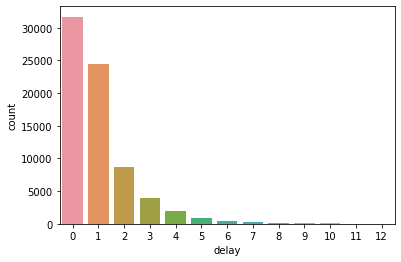

In [3]:
#plot histogram
sns.countplot(x='delay', data=df31)

In [4]:
#count how many vehicles were delayed by how many minutes
df31.delay.value_counts()

0     31697
1     24399
2      8723
3      3886
4      1890
5       860
6       425
7       235
8       150
9        79
10       50
11       21
12        2
Name: delay, dtype: int64

In [5]:
#normalized value of delayed vehicles
df31.delay.value_counts(normalize = True)

0     0.437701
1     0.336924
2     0.120455
3     0.053661
4     0.026099
5     0.011876
6     0.005869
7     0.003245
8     0.002071
9     0.001091
10    0.000690
11    0.000290
12    0.000028
Name: delay, dtype: float64

In [6]:
#describe data
df31.delay.describe()

count    72417.000000
mean         0.997335
std          1.311809
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: delay, dtype: float64

# Delays over specific period of time

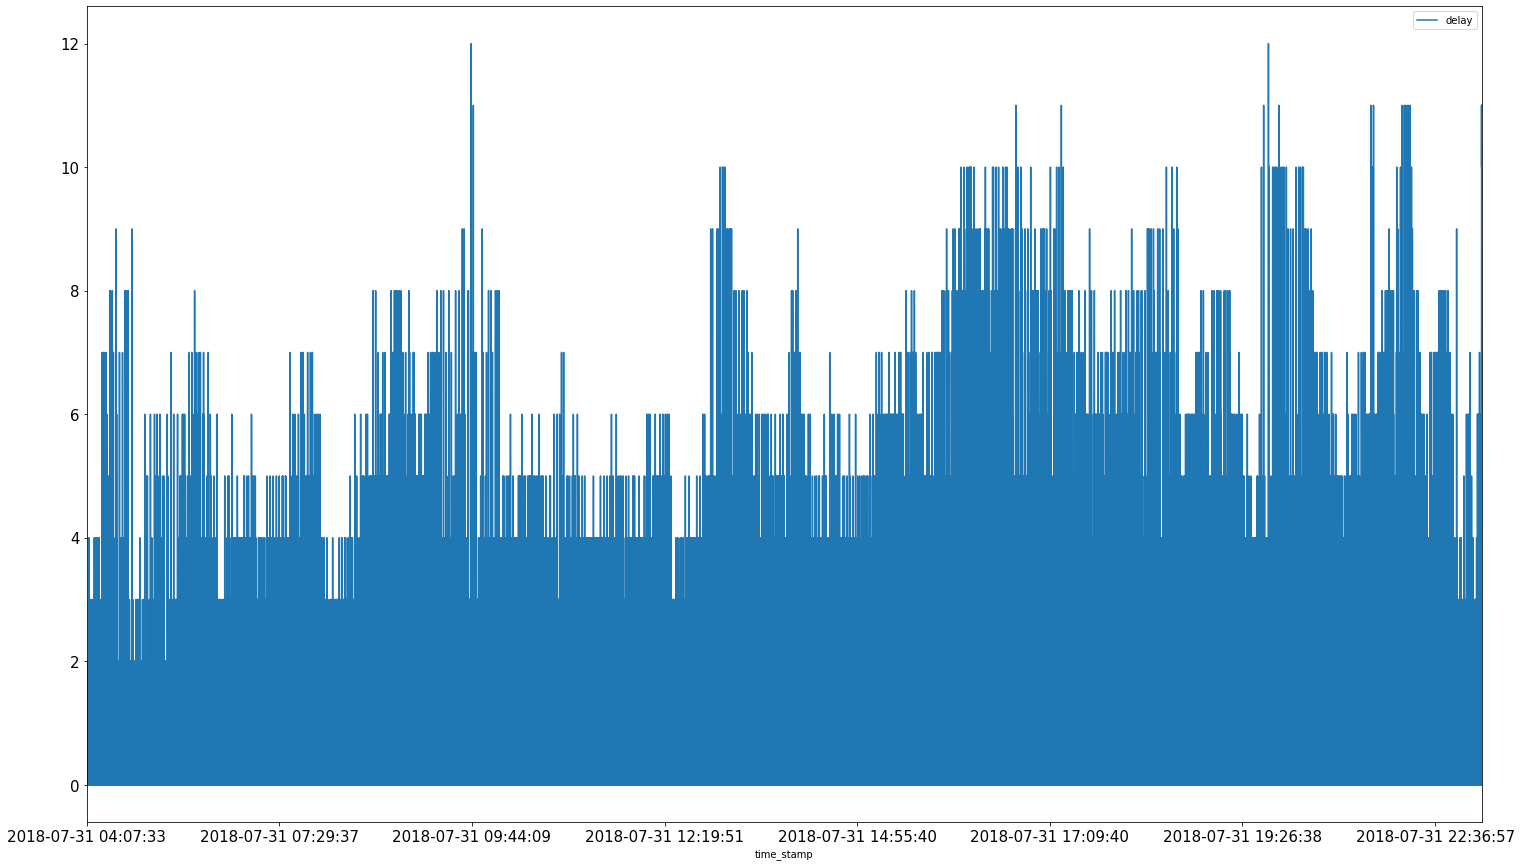

In [7]:
#plot delay over time stamp
df31.plot(x='time_stamp', y='delay', kind='line', figsize=(25,15), fontsize=15)

# Delays on tram stops

In [8]:
#mean delay for given stop
stopMeanDelay = df31.groupby('stopName').delay.mean().reset_index(name='stopMeanDelay')

In [9]:
stopMeanDelay

,stopName,stopMeanDelay
0,AWF,1.114977
1,Agencja Kraków Wschód,1.010417
2,Bardosa,0.899497
3,Batorego,1.472329
4,Białucha,1.167414
...,...,...
148,Ćwiklińskiej,0.589011
149,Łagiewniki,0.742718
150,Łagiewniki ZUS,1.802139
151,Św.Gertrudy,1.277311


In [10]:
stopMeanDelay.describe()

,stopMeanDelay
count,153.000000
mean,0.919087
std,0.358444
min,0.019417
25%,0.724518
50%,0.933962
75%,1.114977
max,1.802139


In [11]:
#mean delay sorted
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False)

,stopName,stopMeanDelay
150,Łagiewniki ZUS,1.802139
48,Kabel,1.617476
72,Muzeum Lotnictwa,1.580981
75,Nowosądecka,1.574648
31,Dworcowa,1.539024
...,...,...
25,Czerwone Maki P+R,0.112971
138,Walcownia,0.073171
59,Krowodrza Górka,0.067692
20,Cichy Kącik,0.020202


In [12]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False).head(10)

,stopName,stopMeanDelay
150,Łagiewniki ZUS,1.802139
48,Kabel,1.617476
72,Muzeum Lotnictwa,1.580981
75,Nowosądecka,1.574648
31,Dworcowa,1.539024
22,Cmentarz Podgórski,1.533825
146,Zabłocie,1.518447
113,Rzebika,1.511475
88,Piaski Nowe,1.498607
53,Klimeckiego,1.480545


In [13]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=True).head(10)

,stopName,stopMeanDelay
23,Cmentarz Rakowicki,0.019417
20,Cichy Kącik,0.020202
59,Krowodrza Górka,0.067692
138,Walcownia,0.073171
25,Czerwone Maki P+R,0.112971
67,Mały Płaszów,0.134328
145,Wzgórza Krzesławickie,0.147929
102,Rakowicka,0.233010
14,Bronowice Małe,0.257576
134,Uniwersytet Ekonomiczny,0.278846


# Delays of tram lines

In [14]:
#mean delay by line
lineMeanDelay = df31.groupby(['number', 'direction']).delay.mean().reset_index(name='lineMeanDelay')

In [15]:
lineMeanDelay

,number,direction,lineMeanDelay
0,1,Salwator,0.761009
1,1,Wzgórza K.,0.655473
2,2,Cm. Rakowicki,0.370642
3,2,Salwator,0.521242
4,3,Dworzec Tow.,0.914530
5,3,Krowodrza Górka,0.710705
6,3,Nowy Bieżanów P+R,1.033008
7,4,Bronowice Małe,0.727859
8,4,Kombinat,0.596154
9,4,Wzgórza K.,1.164375


In [16]:
#mean delay by line sorted
lineMeanDelay.sort_values(by='lineMeanDelay')

,number,direction,lineMeanDelay
20,11,Czerwone Maki P+R,0.258844
2,2,Cm. Rakowicki,0.370642
3,2,Salwator,0.521242
8,4,Kombinat,0.596154
10,5,Krowodrza Górka,0.605833
39,22,Kombinat,0.629139
30,18,Krowodrza Górka,0.649674
43,44,Bronowice,0.653775
1,1,Wzgórza K.,0.655473
45,44,Kopiec Wandy,0.664894


In [17]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=False).head(10)

,number,direction,lineMeanDelay
18,10,Kopiec Wandy,1.717129
40,22,Walcownia,1.659769
13,6,Salwator,1.392991
41,24,Bronowice Małe,1.387524
25,14,Mistrzejowice,1.387027
31,19,Borek Fałęcki,1.383629
42,24,Kurdwanów P+R,1.377037
23,13,Nowy Bieżanów P+R,1.344026
47,50,Prokocim,1.287571
14,8,Borek Fałęcki,1.271654


In [18]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=True).head(10)

,number,direction,lineMeanDelay
20,11,Czerwone Maki P+R,0.258844
2,2,Cm. Rakowicki,0.370642
3,2,Salwator,0.521242
8,4,Kombinat,0.596154
10,5,Krowodrza Górka,0.605833
39,22,Kombinat,0.629139
30,18,Krowodrza Górka,0.649674
43,44,Bronowice,0.653775
1,1,Wzgórza K.,0.655473
45,44,Kopiec Wandy,0.664894


In [19]:
#mean delay by number and direction
lineMeanDelay['number and direction'] = lineMeanDelay.agg('{0[number]} {0[direction]}'.format, axis=1)

In [20]:
lineMeanDelay

,number,direction,lineMeanDelay,number and direction
0,1,Salwator,0.761009,1 Salwator
1,1,Wzgórza K.,0.655473,1 Wzgórza K.
2,2,Cm. Rakowicki,0.370642,2 Cm. Rakowicki
3,2,Salwator,0.521242,2 Salwator
4,3,Dworzec Tow.,0.914530,3 Dworzec Tow.
5,3,Krowodrza Górka,0.710705,3 Krowodrza Górka
6,3,Nowy Bieżanów P+R,1.033008,3 Nowy Bieżanów P+R
7,4,Bronowice Małe,0.727859,4 Bronowice Małe
8,4,Kombinat,0.596154,4 Kombinat
9,4,Wzgórza K.,1.164375,4 Wzgórza K.


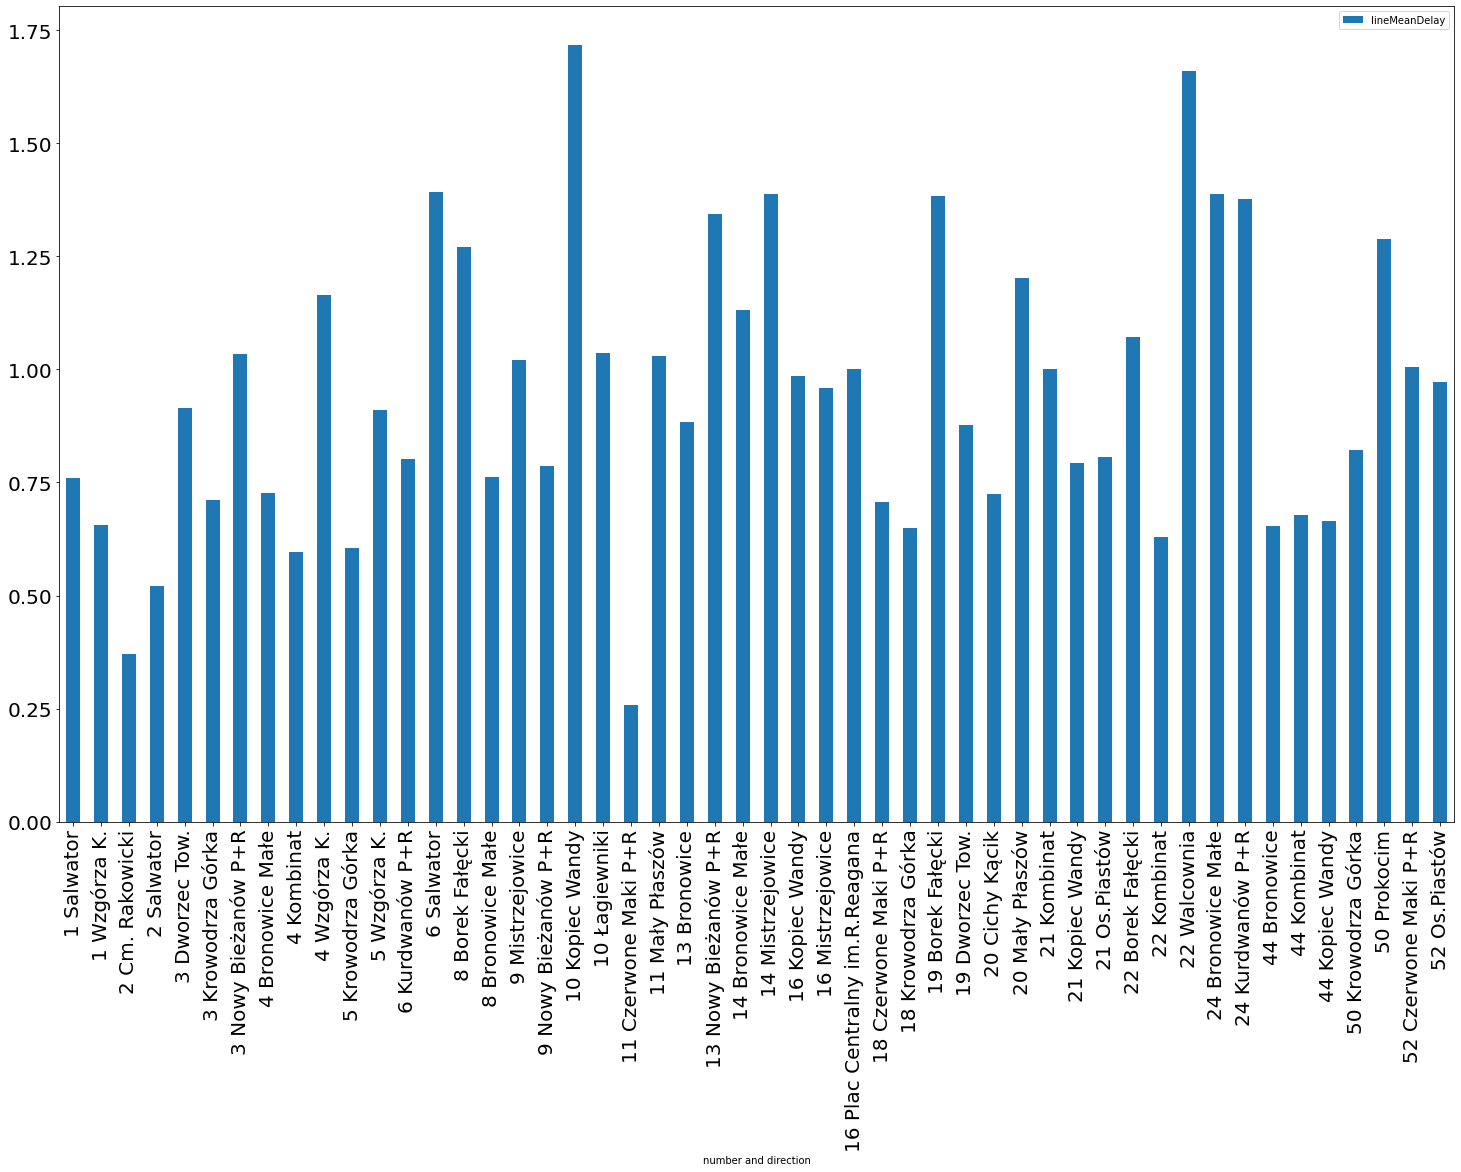

In [21]:
#mean delay by number and direction
lineMeanDelay.plot(x='number and direction', y='lineMeanDelay', kind='bar', figsize=(25,15), fontsize=20)

# Machine Learning model

In [22]:
#column display
df31.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [23]:
#conversion to datetime, sort delay by hour
df31['plannedTime'] = pd.to_datetime (df31['plannedTime'])
df31[['plannedTime']].info()

df31['plannedTime'].dt.hour.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72417 entries, 0 to 72416
Data columns (total 1 columns):
plannedTime    72417 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 565.9 KB


8     4516
17    4512
7     4511
16    4508
15    4464
18    4367
6     4320
9     4282
14    4075
19    3952
10    3842
11    3793
13    3764
12    3757
20    3381
5     3003
21    2818
22    2649
23    1364
4      523
0       16
Name: plannedTime, dtype: int64

In [24]:
df31['delay_secs'] = df31['delay'].map(lambda x: x*60) #change delay to seconds
df31['direction_cat'] = df31['direction'].factorize()[0] #factorize direction
df31['vehicleId'].fillna(-1, inplace = True) #fill null with -1
df31['seq_num'].fillna(-1, inplace = True) #fill null with -1

def gen_id_num_direction(x):
    """
    This function combines two variables, i.e. tram number
    and direction in which this tram is going
    Input:
        x: dataframe
    Output:
        new feature combining tram number and direction  
    """
    return '{} {}'.format(x['number'], x['direction'])
df31['number_direction_id'] = df31.apply(gen_id_num_direction, axis = 1).factorize()[0]

def gen_id_stop_direction(x):
    """
    This function combines two variables, i.e. tram stop
    and direction in which this tram is going
    Input:
        x: dataframe
    Output:
        new feature combining tram stop and direction  
    """
    return '{} {}'.format(x['stop'], x['direction'])
df31['stop_direction_id'] = df31.apply(gen_id_stop_direction, axis = 1).factorize()[0]

#create combinations
feats1 = [
    'number'
]
X1 = df31[ feats1 ].values

feats2 = [
    'number',
    'stop'
]
X2 = df31[ feats2 ].values

feats3 = [
    'number',
    'stop',
    'direction_cat'
]
X3 = df31[ feats3 ].values

feats4 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId'
]
X4 = df31[ feats4 ].values

feats5 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num'
]
X5 = df31[ feats5 ].values

feats6 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id'
]
X6 = df31[ feats6 ].values

feats7 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id'
]
X7 = df31[ feats7 ].values

y = df31['delay_secs'].values


model = DecisionTreeRegressor(max_depth=10, random_state=0) #model
#cross validation scores for specific combinations
scores1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_absolute_error')
scores2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_absolute_error')
scores3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_absolute_error')
scores4 = cross_val_score(model, X4, y, cv=5, scoring='neg_mean_absolute_error')
scores5 = cross_val_score(model, X5, y, cv=5, scoring='neg_mean_absolute_error')
scores6 = cross_val_score(model, X6, y, cv=5, scoring='neg_mean_absolute_error')
scores7 = cross_val_score(model, X7, y, cv=5, scoring='neg_mean_absolute_error')

In [25]:
#value of error for specific combinations
Data = [(abs(np.mean(scores1))),
        (abs(np.mean(scores2))),
        (abs(np.mean(scores3))),
        (abs(np.mean(scores4))),
        (abs(np.mean(scores5))),
        (abs(np.mean(scores6))),
        (abs(np.mean(scores7)))]
        
df31 = pd.DataFrame(Data, index=['feats1','feats2','feats3','feats4','feats5','feats6','feats7'], columns=['np.mean'])

In [26]:
df31

,np.mean
feats1,54.790189
feats2,53.142940
feats3,50.543639
feats4,49.506352
feats5,48.451810
feats6,48.207503
feats7,48.180627


In [27]:
#search for best combination
minVal31 = df31.min()
 
print('Minimum value is: ')
print(minVal31)


minValInd31 = df31.idxmin()
 
print("Min value is at row index position:")
print(minValInd31)

Minimum value is: 
np.mean    48.180627
dtype: float64
Min value is at row index position:
np.mean    feats7
dtype: object


In [28]:
feats7

['number',
 'stop',
 'direction_cat',
 'vehicleId',
 'seq_num',
 'number_direction_id',
 'stop_direction_id']

In [29]:
#standard deviation for best combination
np.std(scores7)

4.032428696075755